This Notebook is ***one of the ten Notebooks*** which form **Intermediate ML Micro Course** as listed on https://datascience.suvenconsultants.com/elearning/

# **Best way to study is :**
1. See the Video once or twice.
2. Go through the NB
3. Run codes to see the o/p's
4. As this NB is read only, hence you can't make changes. 
5. Copy the content of the code cells to your own Colab NB and learn better by making changes.
6. You don't understand any thing in this NB , feel free to connect with me on rocky@suvenconsultants.com or https://www.linkedin.com/in/rocky-jagtiani-3b390649/  

**Pre-requiste for this NB** : One should know Python and Machine Learning - Beginner level Microcourse. 

In this NoteBook, you will learn how to use cross-validation for better measures of model performance.

**`Introduction`**

Machine learning is an <u><b>iterative</b></u> process.

You will face choices about what predictive variables to use, what types of models to use, what arguments to supply to those models, etc. So far, you have made these choices in a data-driven way by measuring model quality with a validation (<i>or that 20% test data</i>) set.

But there are some drawbacks to this approach. To see this, imagine you have a dataset with 5000 rows. You will typically keep about 20% of the data as a validation dataset, or 1000 rows. But this leaves some random chance in determining model scores. That is, a model might do well on one set of 1000 rows, even if it would be inaccurate on a different 1000 rows.

In general, the larger the validation set, the less randomness (aka "noise") there is in our measure of model quality, and the more reliable it will be. Unfortunately, we can only get a large validation set by removing rows from our training data, and smaller training datasets mean worse models!

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/LmxsySwAhoE?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')
# turn on net connection on your PC, to watch the video 
# and then read further

What is cross-validation?
--

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

For example, we could begin by dividing the data into 5 pieces, each 20% of the full dataset. In this case, we say that we have broken the data into 5 "folds".

![SuvenML_CrossValidation_Image](https://drive.google.com/uc?id=1F6jNuimRQbnxw0knpRmb1ADuCZ2Zgx-I)


**`Then, we run one experiment for each fold:`**

1. In Experiment 1, we use the first fold as a validation (or holdout) set and everything else as training data. This gives us a measure of model quality based on a 20% holdout set.
<br><br>
2. In Experiment 2, we hold out data from the second fold (and use everything except the second fold for training the model). The holdout set is then used to get a second estimate of model quality.
<br><br>
3. We repeat this process, using every fold once as the holdout set. Putting this together, 100% of the data is used as holdout at some point, and we end up with a measure of model quality that is based on all of the rows in the dataset (even if we don't use all rows simultaneously).

When should you use cross-validation?
--

Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, **`it can take longer to run`**, because it estimates multiple models (one for each fold).

**So, given these <u>tradeoffs</u>, when should you use each approach?**

> For small datasets, where extra computational burden isn't a big deal, you should run cross-validation.

> For larger datasets, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

> There's no simple threshold for what constitutes a large vs. small dataset. But if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.

Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.

**`Summarizing till this point`**
> Cross-Validation or k-Fold Cross-Validation is a **resampling procedure** used to evaluate machine learning models on a **limited data sample**.

How to implement it ?
--

**`The general procedure is as follows`**:

1. Shuffle the dataset randomly.
<br><br>
2. Split the dataset into k groups ( usual values of **k** range from 5 to 20 )
<br><br>
3. For each unique group:
<br><br>

> a. Take the group as a hold out or test data set

> b. Take the remaining groups as a training data set

> c. Fit a model on the training set and evaluate it on the test set

> d. Retain the evaluation score and discard the model
<br>

4. Summarize the skill of the model by taking **mean** of model evaluation scores

## Lets go step by step to understand Cross Validation **practically**. 
We would **first** run through a <u>concept</u> example and <u>then</u> try and apply over **Iris Data set for finding** : 

1. Most approriate accuracy for a given model. We would choose KNN classifier.
<br><br>
2. Search for an optimal value of K for KNN
<br><br>
3. Better of 2 ML Models. Here we would compare KNN with LogisticRegression.
<br><br>
and **lastly** 
<br><br>
4. Do feature selection from some `advertising dataset` from **kaggle**

In [7]:
###########################   Concept Example  ####################################
# ------------------------------------------------------------------------------------

# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold

# Imagine we have a data sample with 6 observations:
suvenML_data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# The first step is to pick a value for k in order to determine the number of folds 
# used to split the data. Here, we will use a value of k=3.

# For example:
## Model1: Trained on Fold1 + Fold2, Tested on Fold3
## Model2: Trained on Fold2 + Fold3, Tested on Fold1
## Model3: Trained on Fold1 + Fold3, Tested on Fold2

# We do not have to implement k-fold cross-validation manually. 
# The scikit-learn library provides an implementation for it.
kfold = KFold(3, True, 1)
#  Here 3 -> indicates no. of folds, shuffle = True means we want to split shuffled data
# and 1 -> is the random_state

# we then use the split() function
# enumerate splits
for train, test in kfold.split(suvenML_data):
	print('train: %s, test: %s' % (suvenML_data[train], suvenML_data[test]))

train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]


In [8]:
#####   Real Example using Iris dataset. Here I have not used CrossValidation #######
# ------------------------------------------------------------------------------------

from sklearn.datasets import load_iris
#from sklearn.cross_validation import train_test_split   # is changed to sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the accuracy changes a lot
# this is why testing accuracy is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9736842105263158

<font color="red">**Question:**</font> What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

<font color="red">**Answer:**</font> That's the essense of cross-validation (also called CV)!!

`Note` : This is also the <u>first application</u> of CV

In [9]:
# Redo-ing the above example with Cross Validation 
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of 
# splitting the data
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought their are many
suvenML_KNN_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(suvenML_KNN_scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


**`Note`** : In the first iteration, the accuracy is 100%. Second iteration, the accuracy is 93% and so on. 

So we can report the final , single value of Model metric as **`mean`** of the metric. 

In [10]:
print(suvenML_KNN_scores.mean())

## This metric of the ML model(i.e 96.66%) is better representative than 97.36%.  

0.9666666666666668


**Can You solve this ?**

> Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

`Note` : This is the <u>second application</u> of CV

In [11]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)

# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    suvenML_KNN_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(suvenML_KNN_scores.mean())


print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [12]:
# in essence, this is basically running the k-fold cross-validation method 30 times 
# because we want to run through K values from 1 to 30
# we should have 30 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.9800000000000001


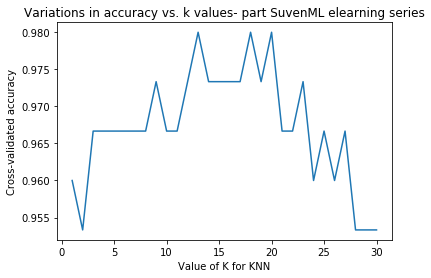

In [13]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.title("Variations in accuracy vs. k values- part SuvenML elearning series")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy');

**`Observation and learnings`** :

1. The maximum cv accuracy occurs from k=13 to k=20
<br><br>
2. The general shape of the curve is an upside down yield. This is quite typical when examining the model complexity and accuracy. This is an example of bias-variance trade off

> **Low values of k (low bias, high variance)**<br>
<font color="red"> The 1-Nearest Neighbor classifier is the most complex nearest neighbor model
It has the most jagged decision boundary, and is most likely to overfit </font>

> **High values of k (high bias, low variance)**<br>
<font color="red"> underfit </font>

> **Best value is the middle of k (most likely to generalize out-of-sample data)**<br>
<font color="red"> just right </font>

> The best value of k<br>
<font color="red"> Higher values of k produce less complex model, So we will choose **20** as our best KNN model </font>

**Can You solve this ?**

> Find the better of 2 models :  KNN or logistic regression when used for classifying on the iris dataset.

`Note` : This is the <u>third application</u> of CV

In [14]:
# Goal: Compare the best KNN model with logistic regression on the iris dataset

# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)        ##  ML model 1

# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [15]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()                     ##  ML model 2
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9733333333333334


**We can conclude that KNN is likely a better choice than logistic regression**

**Can You solve this ?**

> Find the best features out of many fetures or simply said Applying CV for <u>feature selection</u>

`Note` : This is the <u>fourth application</u> of CV

In [16]:
# upload the dataset Advertising_forSuvenMLVideoSeries.csv from Rocky sir's drive
# steps :
# first download the file on your local PC
# download from this link https://drive.google.com/open?id=1xbCZSBcWmGqEHxpCvV7hIRrrQIgJ44_Q

# now run this script to upload the dataset to your colab account.
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google'

In [17]:
# Goal: Select whether the Newspaper feature should be included in the linear regression model 
# on the advertising dataset or Not ????

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# read in the advertising dataset
data = pd.read_csv('C:\Program Files\Python36\suven\ML\datasets_n_images\Advertising_forSuvenMLVideoSeries.csv', index_col=0)
# data source : https://www.kaggle.com/sazid28/advertising.csv

print(data.head()) # its quite obvious that sales would be the target variable
print("------------No. of rows & columns------------------")
print(data.shape)

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
------------No. of rows & columns------------------
(200, 4)


In [18]:
# create a Python list of three feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the DataFrame (X)
X = data[feature_cols]

# select the Sales column as the response (y)
# since we're selecting only one column, we can select the attribute using .attribute
y = data.sales

In [19]:
# 10-fold cross-validation with all three features
# instantiate model
lm = LinearRegression()

# store scores in scores object
# we can't use accuracy as our evaluation metric since that's only relevant for classification problems
# RMSE is not directly available so we will use MSE
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

# Please Note choosing scoring='mean_squared_error' would give us a deprecation Warning. 
# Hence I have selected scoring='neg_mean_squared_error'. You can try by self also.   

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


**MSE should be positive. But why is the MSE here negative?**

> MSE is a <u>loss function</u>. It is something we want to <u>minimize</u>

> A design decision was made so that the results are made negative. The best results would be the largest number (the least negative) so we can still maximize similar to classification accuracy

> Classification Accuracy is a <u>reward function</u>. It is something we want to maximize

In [20]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [21]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [22]:
# calculate the average RMSE
print(rmse_scores.mean())

1.6913531708051797


In [23]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.6796748419090766


**Without Newspaper, Average RMSE = 1.68
<br><br>
`lower number than with model with Newspaper`**

> RMSE is something we want to <u>minimize</u>. **So the model excluding Newspaper is a better model**.

Thank you for going through the Notebook. I am sure it was a fruitful learning exprience. Even you can earn your **`"Masters in Data Science"`** certification followed with Internships and Placement calls. Do look at https://datascience.suven.net for classroom training programmes or the https://datascience.suven.net/elearning for **`online learning with continuous support`** from <u>Rocky Sir & his team of data scientist for doubt solving</u>.

![Certification_Pic](https://drive.google.com/uc?id=1DI086pzwiN3eb-kQ0uxh_BznA4OA7GIM)


Resources
--

1. scikit-learn documentation: <a href="https://scikit-learn.org/stable/modules/cross_validation.html">Cross-validation</a>, 
<a href="https://scikit-learn.org/stable/modules/model_evaluation.html">Model evaluation</a>
<br><br>
2. scikit-learn issue on GitHub: <a href="https://github.com/scikit-learn/scikit-learn/issues/2439">MSE is negative when returned by cross_val_score</a>
<br><br> 
3. Scott Fortmann-Roe:  <a href="http://scott.fortmann-roe.com/docs/MeasuringError.html">Accurately Measuring Model Prediction Error</a>
<br><br> 
4. Machine Learning Mastery: <a href="https://machinelearningmastery.com/an-introduction-to-feature-selection/">An Introduction to Feature Selection</a>
<br><br> 
5. Harvard CS109: Cross-Validation: <a href=" https://github.com/cs109/content/blob/master/lec_10_cross_val.ipynb">The Right and Wrong Way</a>
<br><br> 
6. Journal of Cheminformatics: <a href="https://jcheminf.biomedcentral.com/track/pdf/10.1186/1758-2946-6-10">Cross-validation pitfalls when selecting and assessing regression and classification models</a>
<br><br>
7. www.kaggle.com for the datasets and many great notebooks
<br><br>
8. Connect with me if you don't understand something in this NoteBook. <br> You can connect with me on <b>rocky@suvenconsultants.com</b>  or on  LinkedIn here https://www.linkedin.com/in/rocky-jagtiani-3b390649/